# Predicting used car prices with the best model possible

**Business Objective:** We have been hired by a used car dealer (Cars Cars Cars) to create a pricing model they can use in their operations. They have provided as a file (attached) with car prices and several features we can use to create a model to predict these prices.
car data.csv Download car data.csv
The dependent variable is column "selling price" in the file. "Present price" describes the current price of the car if we were going to buy it new. The rest of the columns are self explanatory.

Your job is to use all regression and data preparation techniques you know to create the best model for our customer.

You have to deliver a visually appealing notebook that explores all alternatives, describes all relevant steps and presents conclusions in a clear way. We have been hired by Cars Cars Cars CTO, and eventhough she has basic knowledge about regression techniques and a technical background she might need some context in some of the steps to fully understand our deliverable.

Of course after presenting the different alternatives with its performance metrics we have to describe the one that is obtaining the best results.

This is the first work we do for this customer and we want to create a great impression so we can become their data science partners for the rest of their projects, so use all you've got to create a great model with a performance better than the competition!!

## **Project Outline**
#### **1. Data Exploration**
#### **2. Data Preprocessing**
* **2.1 Data Cleaning**
* **2.2 Summary Report**
* **2.3 Model Functions**
#### **3. Model Comparison**
* **3.1 Linear Regression**
* **3.2 Support Vector Machines**
* **3.3 Linear SVR**
* **3.4 MLP Regressor**
* **3.5 Decision Tree Regressor**
* **3.6 Stochastic Gradient Descent**
* **3.7 Random Forest with GridSearchCV**
* **3.8 XGB**
* **3.9 LGBM**
* **3.10 GradientBoostingRegressor with HyperOpt**
* **3.11 RidgeRegressor**
* **3.12 BaggingRegressor**
* **3.13 ExtraTreesRegressor**
* **3.14 AdaBoostRegressor**
* **3.15 VotingRegressor**
#### **4. Model Selection**
#### **5. Prediction**

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
#import ydata_profiling as pp

# Models
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb
import lightgbm as lgb

# Model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

# Error handling
import warnings
warnings.filterwarnings("ignore")

# Data visualization
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## **1. Data Exploration**

In the first step we will explore the data and get a better understanding of the data. We will look at the data types, missing values, and the distribution of the data. We will also look at the correlation between the variables and the target variable.

In [5]:
train0 = pd.read_csv('../data/car data.csv')
train0

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type   
0       ritz  2014           3.35           5.59       27000    Petrol  \
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0  
2        Dealer       Manual      0  
3        Dealer       Manual      0  
4        Dealer       Manual      0  
..          ...          ...    ...  
296      Dealer       Manual      0  
297      Dealer       Manual      0  
298      Dealer       Manual      0  
299      Dealer       Manual      0  
300      Dealer       Manual      0  

[301 rows x 9 columns]

In [ ]:
# Regression for all variables vs Selling_Price in plotly dark theme
fig = px.scatter_matrix(train0, dimensions=["Present_Price", "Kms_Driven", "Owner", "Year", "Selling_Price"], color="Selling_Price", title="Regression  for all variables vs Selling_Price in plotly dark theme")
fig.update_traces(diagonal_visible=False, marker=dict(size=2, line=dict(width=1, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig.update_layout(width=1000, height=600)
# invert the colorscale for the y-axis
fig.update_layout(coloraxis_colorscale='sunsetdark')

fig.show()

**Hint:** For visibility purposes the color is prechoosen. To adjust to audience needs, use one of the following color scales
for continuous data.


In [10]:
named_colorscales = list(px.colors.named_colorscales())
named_colorscales

['aggrnyl',
 'agsunset',
 'blackbody',
 'bluered',
 'blues',
 'blugrn',
 'bluyl',
 'brwnyl',
 'bugn',
 'bupu',
 'burg',
 'burgyl',
 'cividis',
 'darkmint',
 'electric',
 'emrld',
 'gnbu',
 'greens',
 'greys',
 'hot',
 'inferno',
 'jet',
 'magenta',
 'magma',
 'mint',
 'orrd',
 'oranges',
 'oryel',
 'peach',
 'pinkyl',
 'plasma',
 'plotly3',
 'pubu',
 'pubugn',
 'purd',
 'purp',
 'purples',
 'purpor',
 'rainbow',
 'rdbu',
 'rdpu',
 'redor',
 'reds',
 'sunset',
 'sunsetdark',
 'teal',
 'tealgrn',
 'turbo',
 'viridis',
 'ylgn',
 'ylgnbu',
 'ylorbr',
 'ylorrd',
 'algae',
 'amp',
 'deep',
 'dense',
 'gray',
 'haline',
 'ice',
 'matter',
 'solar',
 'speed',
 'tempo',
 'thermal',
 'turbid',
 'armyrose',
 'brbg',
 'earth',
 'fall',
 'geyser',
 'prgn',
 'piyg',
 'picnic',
 'portland',
 'puor',
 'rdgy',
 'rdylbu',
 'rdylgn',
 'spectral',
 'tealrose',
 'temps',
 'tropic',
 'balance',
 'curl',
 'delta',
 'oxy',
 'edge',
 'hsv',
 'icefire',
 'phase',
 'twilight',
 'mrybm',
 'mygbm']

### **2. Data Preprocessing**
In the second step we will preprocess the data. We will look at the data types, missing values, and the distribution of the data. We will also look at the correlation between the variables and the target variable.

In [11]:
# Determination categorical features
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = train0.columns.values.tolist()
for col in features:
    if train0[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in train0.columns:
        le = LabelEncoder()
        le.fit(list(train0[col].astype(str).values))
        train0[col] = le.transform(list(train0[col].astype(str).values))

In [12]:
train0['Year'] = (train0['Year']-1900).astype(int)
train0['Selling_Price'] = train0['Selling_Price'].astype(int)
train0['Present_Price'] = train0['Present_Price'].astype(int)

In [13]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Car_Name       301 non-null    int64
 1   Year           301 non-null    int64
 2   Selling_Price  301 non-null    int64
 3   Present_Price  301 non-null    int64
 4   Kms_Driven     301 non-null    int64
 5   Fuel_Type      301 non-null    int64
 6   Seller_Type    301 non-null    int64
 7   Transmission   301 non-null    int64
 8   Owner          301 non-null    int64
dtypes: int64(9)
memory usage: 21.3 KB


In [14]:
train0['Selling_Price'].value_counts()

0     78
4     34
5     30
1     29
3     28
2     24
6     17
7     15
8     10
9      8
11     6
23     4
14     4
10     3
18     2
19     2
12     2
16     1
33     1
35     1
20     1
17     1
Name: Selling_Price, dtype: int64

In [15]:
train0.corr()

Car_Name      Year  Selling_Price  Present_Price  Kms_Driven  \
Car_Name       1.000000  0.017265       0.492795       0.479768    0.064453   
Year           0.017265  1.000000       0.229302      -0.049269   -0.524342   
Selling_Price  0.492795  0.229302       1.000000       0.877518    0.032597   
Present_Price  0.479768 -0.049269       0.877518       1.000000    0.206896   
Kms_Driven     0.064453 -0.524342       0.032597       0.206896    1.000000   
Fuel_Type     -0.371446 -0.053643      -0.503878      -0.439934   -0.166801   
Seller_Type   -0.829718 -0.039896      -0.542332      -0.515092   -0.101419   
Transmission  -0.059855  0.000394      -0.367935      -0.349275   -0.162510   
Owner         -0.081192 -0.182104      -0.083877       0.007089    0.089216   

               Fuel_Type  Seller_Type  Transmission     Owner  
Car_Name       -0.371446    -0.829718     -0.059855 -0.081192  
Year           -0.053643    -0.039896      0.000394 -0.182104  
Selling_Price  -0.503878    -0.542332     -0.367935 -0.083877  
Present_Price  -0.439934    -0.515092     -0.349275  0.007089  
Kms_Driven     -0.166801    -0.101419     -0.162510  0.089216  
Fuel_Type       1.000000     0.352415      0.080466  0.055705  
Seller_Type     0.352415     1.000000      0.063240  0.124269  
Transmission    0.080466     0.063240      1.000000 -0.050316  
Owner           0.055705     0.124269     -0.050316  1.000000

In [16]:
# Correlation matrix
corrmat = train0.corr()
fig = ff.create_annotated_heatmap(z=corrmat.values, x=list(corrmat.columns), y=list(corrmat.index), annotation_text=corrmat.round(2).values, colorscale='tropic')
fig.update_layout(title_text='Correlation matrix with rounded numbers in size 10x10', width=1000, height=600)
fig.show()

In [17]:
train0.describe()

Car_Name        Year  Selling_Price  Present_Price     Kms_Driven  \
count  301.000000  301.000000     301.000000     301.000000     301.000000   
mean    62.571429  113.627907       4.215947       7.033223   36947.205980   
std     25.573535    2.891554       5.098681       8.663654   38886.883882   
min      0.000000  103.000000       0.000000       0.000000     500.000000   
25%     47.000000  112.000000       0.000000       1.000000   15000.000000   
50%     69.000000  114.000000       3.000000       6.000000   32000.000000   
75%     82.000000  116.000000       6.000000       9.000000   48767.000000   
max     97.000000  118.000000      35.000000      92.000000  500000.000000   

        Fuel_Type  Seller_Type  Transmission       Owner  
count  301.000000   301.000000    301.000000  301.000000  
mean     1.787375     0.352159      0.867110    0.043189  
std      0.425801     0.478439      0.340021    0.247915  
min      0.000000     0.000000      0.000000    0.000000  
25%      2.000000     0.000000      1.000000    0.000000  
50%      2.000000     0.000000      1.000000    0.000000  
75%      2.000000     1.000000      1.000000    0.000000  
max      2.000000     1.000000      1.000000    3.000000

### **2.2. Summary Report**
The summary report delivers a quick overview of the data. It is a great way to get a quick overview of the data and to identify potential problems. The report is generated using the ydata_profiling library.

In [18]:
train0 = train0.dropna()
pp.ProfileReport(train0)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
target_name = 'Selling_Price'
train_target0 = train0[target_name]
train0 = train0.drop([target_name], axis=1)

In [20]:
# Synthesis test0 from train0
train0, test0, train_target0, test_target0 = train_test_split(train0, train_target0, test_size=0.2, random_state=0)

In [21]:
# For boosting model
train0b = train0
train_target0b = train_target0
# Synthesis valid as test for selection models
trainb, testb, targetb, target_testb = train_test_split(train0b, train_target0b, test_size=0.3, random_state=0)

In [22]:
#For models from Sklearn
scaler = StandardScaler()
train0 = pd.DataFrame(scaler.fit_transform(train0), columns = train0.columns)

In [23]:
train0.head(3)

Car_Name      Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0  0.598144  0.147092       0.108990    1.057060  -1.880246    -0.754074   
1  0.519998 -0.531795      -0.336246   -0.352927   0.482367    -0.754074   
2  0.754436  1.165424       3.225646   -0.774061  -1.880246    -0.754074   

   Transmission     Owner  
0      0.370730 -0.139347  
1      0.370730 -0.139347  
2     -2.697381 -0.139347

In [24]:
len(train0)

240

In [26]:
# Synthesis valid as test for selection models
train, test, target, target_test = train_test_split(train0, train_target0, test_size=0.2, random_state=0)

In [27]:
train.head(3)

Car_Name      Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
110  0.871655 -0.871239      -0.113628   -0.165177   0.482367    -0.754074   
239 -1.902534  0.147092      -0.781483   -0.590949   0.482367     1.326130   
63  -1.433657  0.486536      -0.781483   -0.757414   0.482367     1.326130   

     Transmission     Owner  
110       0.37073 -0.139347  
239       0.37073 -0.139347  
63        0.37073 -0.139347

In [28]:
test.head(3)

Car_Name      Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
109  0.754436 -0.531795       2.557791    1.573270  -1.880246    -0.754074   
71   0.949802  0.825980       2.001245   -0.227103  -1.880246    -0.754074   
37  -1.980680  1.165424      -0.670174   -0.888209   0.482367     1.326130   

     Transmission     Owner  
109     -2.697381 -0.139347  
71      -2.697381 -0.139347  
37       0.370730 -0.139347

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 110 to 172
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       192 non-null    float64
 1   Year           192 non-null    float64
 2   Present_Price  192 non-null    float64
 3   Kms_Driven     192 non-null    float64
 4   Fuel_Type      192 non-null    float64
 5   Seller_Type    192 non-null    float64
 6   Transmission   192 non-null    float64
 7   Owner          192 non-null    float64
dtypes: float64(8)
memory usage: 13.5 KB


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 109 to 7
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       48 non-null     float64
 1   Year           48 non-null     float64
 2   Present_Price  48 non-null     float64
 3   Kms_Driven     48 non-null     float64
 4   Fuel_Type      48 non-null     float64
 5   Seller_Type    48 non-null     float64
 6   Transmission   48 non-null     float64
 7   Owner          48 non-null     float64
dtypes: float64(8)
memory usage: 3.4 KB


In [31]:
acc_train_r2 = []
acc_test_r2 = []
acc_train_d = []
acc_test_d = []
acc_train_rmse = []
acc_test_rmse = []

### **2.3 Model Functions**
Packing our model functions in a single function allows us to easily call them later for multiple models. We will use the following functions:

In [32]:
def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5

In [33]:
def acc_boosting_model(num,model,train,test,num_iteration=0):
    # Calculation of accuracy of boosting model by different metrics

    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse

    if num_iteration > 0:
        ytrain = model.predict(train, num_iteration = num_iteration)
        ytest = model.predict(test, num_iteration = num_iteration)
    else:
        ytrain = model.predict(train)
        ytest = model.predict(test)

    print('target = ', targetb[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(targetb, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(targetb, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(targetb, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_testb[:5].values)
    print('ytest =', ytest[:5])

    acc_test_r2_num = round(r2_score(target_testb, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)

    acc_test_d_num = round(acc_d(target_testb, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)

    acc_test_rmse_num = round(acc_rmse(target_testb, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [34]:
def acc_model(num,model,train,test):
    # Calculation of accuracy of model акщь Sklearn by different metrics

    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse

    ytrain = model.predict(train)
    ytest = model.predict(test)

    print('target = ', target[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(target, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(target, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(target, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_test[:5].values)
    print('ytest =', ytest[:5])

    acc_test_r2_num = round(r2_score(target_test, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)

    acc_test_d_num = round(acc_d(target_test, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)

    acc_test_rmse_num = round(acc_rmse(target_test, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

## 3. Model Comparison
Now, that we have prepared our data and defined our functions, we can start to compare different models. We will use the following models:

### 3.1 Linear Regression
Linear Regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. Reference Wikipedia.

Note the confidence score generated by the model based on our training dataset.

In [35]:
# Linear Regression

linreg = LinearRegression()
linreg.fit(train, target)
acc_model(0,linreg,train,test)

target =  [2 0 0 0 7]
ytrain =  [2.64426551 0.49514931 0.83348214 0.87416613 6.57241738]
acc(r2_score) for train = 86.53
acc(relative error) for train = 30.5
acc(rmse) for train = 187.52
target_test = [14 20  1  9  0]
ytest = [16.60386604 16.41219025  2.1424285   9.64345065  3.77632914]
acc(r2_score) for test = 82.07
acc(relative error) for test = 42.93
acc(rmse) for test = 214.93


### 3.2 Support Vector Machines
Support Vector Machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Obtained from Wikipedia.

In [36]:
# Support Vector Machines

svr = SVR()
svr.fit(train, target)
acc_model(1,svr,train,test)

target =  [2 0 0 0 7]
ytrain =  [ 2.50442859 -0.0289507   0.10061086  0.61474311  6.00538421]
acc(r2_score) for train = 48.61
acc(relative error) for train = 31.39
acc(rmse) for train = 366.3
target_test = [14 20  1  9  0]
ytest = [7.26926331 8.78543825 0.34673698 5.98769573 0.46354626]
acc(r2_score) for test = 63.97
acc(relative error) for test = 36.2
acc(rmse) for test = 304.66


### 3.3 Linear Support Vector Regression
Linear SVR is a similar to SVM method. Its also builds on kernel functions but is appropriate for unsupervised learning. Reference Wikipedia.

In [37]:
# Linear SVR

linear_svr = LinearSVR()
linear_svr.fit(train, target)
acc_model(2,linear_svr,train,test)

target =  [2 0 0 0 7]
ytrain =  [2.9755524  0.23169843 0.42382884 0.42786089 5.34027192]
acc(r2_score) for train = 83.77
acc(relative error) for train = 27.75
acc(rmse) for train = 205.84
target_test = [14 20  1  9  0]
ytest = [15.21698892 14.13356643  1.41970872  9.43041139  1.87629647]
acc(r2_score) for test = 84.15
acc(relative error) for test = 36.14
acc(rmse) for test = 202.08


### 3.4 MLP Regressor
MLPRegressor is a multi-layer Perceptron regressor. This model optimizes the squared-loss using LBFGS or stochastic gradient descent. Reference Scikit-learn.

In [38]:
# MLPRegressor

mlp = MLPRegressor()
param_grid = {'hidden_layer_sizes': [i for i in range(2,20)],
              'activation': ['relu'],
              'solver': ['adam'],
              'learning_rate': ['constant'],
              'learning_rate_init': [0.01],
              'power_t': [0.5],
              'alpha': [0.0001],
              'max_iter': [1000],
              'early_stopping': [True],
              'warm_start': [False]}
mlp_GS = GridSearchCV(mlp, param_grid=param_grid,
                      cv=10, verbose=True, pre_dispatch='2*n_jobs')
mlp_GS.fit(train, target)
acc_model(3,mlp_GS,train,test)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
target =  [2 0 0 0 7]
ytrain =  [3.18074857 0.24374848 0.48558255 0.94047939 6.67686458]
acc(r2_score) for train = 87.22
acc(relative error) for train = 30.73
acc(rmse) for train = 182.65
target_test = [14 20  1  9  0]
ytest = [16.49464313 20.00891626  0.50411972  8.22380153  3.57689224]
acc(r2_score) for test = 82.56
acc(relative error) for test = 37.08
acc(rmse) for test = 211.97


### 3.5 Stochastic Gradient Descent
Stochastic gradient descent (often shortened to SGD) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). Reference Wikipedia.

In [39]:
# Stochastic Gradient Descent

sgd = SGDRegressor()
sgd.fit(train, target)
acc_model(4,sgd,train,test)

target =  [2 0 0 0 7]
ytrain =  [2.64963441 0.42604986 0.8091711  0.97455468 6.55608975]
acc(r2_score) for train = 86.52
acc(relative error) for train = 30.67
acc(rmse) for train = 187.62
target_test = [14 20  1  9  0]
ytest = [16.58956408 16.42579043  2.07741175  9.60357229  3.81207503]
acc(r2_score) for test = 82.06
acc(relative error) for test = 42.94
acc(rmse) for test = 214.97


### 3.6 Descision Tree Regressor
This model uses a Decision Tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference Wikipedia.

In [40]:
# Decision Tree Regression

decision_tree = DecisionTreeRegressor()
decision_tree.fit(train, target)
acc_model(5,decision_tree,train,test)

target =  [2 0 0 0 7]
ytrain =  [2. 0. 0. 0. 7.]
acc(r2_score) for train = 100.0
acc(relative error) for train = 0.0
acc(rmse) for train = 0.0
target_test = [14 20  1  9  0]
ytest = [14. 23.  1.  9.  0.]
acc(r2_score) for test = 94.99
acc(relative error) for test = 15.22
acc(rmse) for test = 113.65


### 3.7 Random Forest
Random Forest is one of the most popular model. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators= [100, 300]) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference Wikipedia.

In [41]:
# Random Forest

#random_forest = GridSearchCV(estimator=RandomForestRegressor(), param_grid={'n_estimators': [100, 1000]}, cv=5)
random_forest = RandomForestRegressor()
random_forest.fit(train, target)
acc_model(6,random_forest,train,test)

target =  [2 0 0 0 7]
ytrain =  [2.42 0.   0.   0.   6.56]
acc(r2_score) for train = 97.84
acc(relative error) for train = 7.47
acc(rmse) for train = 75.08
target_test = [14 20  1  9  0]
ytest = [16.01 19.61  0.8   6.62  0.  ]
acc(r2_score) for test = 97.07
acc(relative error) for test = 14.42
acc(rmse) for test = 86.91


### 3.8 XGBoost
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples. Reference Wikipedia.

In [82]:
#----------------ATTETION MISSCONFIGURED----------------
xgb_clf = xgb.XGBRegressor({'objective': 'reg:squarederror'})
parameters = {'n_estimators': [60, 100, 120, 140],
              'learning_rate': [0.01, 0.1],
              'max_depth': [5, 7],
              'reg_lambda': [0.5]}
xgb_reg = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=5, n_jobs=-1).fit(trainb, targetb)
print("Best score: %0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_)
acc_boosting_model(7,xgb_reg,trainb,testb)

ValueError: 
All the 80 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/sklearn.py", line 1025, in fit
    self._Booster = train(
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [22:36:16] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror

Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000012ececb15 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x000000012ee70142 xgboost::ObjFunction::Create(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const&, xgboost::GenericParameter const*) + 978
  [bt] (2) 3   libxgboost.dylib                    0x000000012ee16de5 xgboost::LearnerConfiguration::ConfigureObjective(xgboost::LearnerTrainParam const&, std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > >*) + 1813
  [bt] (3) 4   libxgboost.dylib                    0x000000012ee0af6e xgboost::LearnerConfiguration::Configure() + 1182
  [bt] (4) 5   libxgboost.dylib                    0x000000012ee0b2d9 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 105
  [bt] (5) 6   libxgboost.dylib                    0x000000012ed0801f XGBoosterUpdateOneIter + 143
  [bt] (6) 7   libffi.8.dylib                      0x000000010b780d92 ffi_call_unix64 + 82
  [bt] (7) 8   ???                                 0x00000003033d6640 0x0 + 12939257408



--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/sklearn.py", line 1025, in fit
    self._Booster = train(
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [22:36:16] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror

Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000132cd6b15 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x0000000132e5a142 xgboost::ObjFunction::Create(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const&, xgboost::GenericParameter const*) + 978
  [bt] (2) 3   libxgboost.dylib                    0x0000000132e00de5 xgboost::LearnerConfiguration::ConfigureObjective(xgboost::LearnerTrainParam const&, std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > >*) + 1813
  [bt] (3) 4   libxgboost.dylib                    0x0000000132df4f6e xgboost::LearnerConfiguration::Configure() + 1182
  [bt] (4) 5   libxgboost.dylib                    0x0000000132df52d9 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 105
  [bt] (5) 6   libxgboost.dylib                    0x0000000132cf201f XGBoosterUpdateOneIter + 143
  [bt] (6) 7   libffi.8.dylib                      0x000000010f76ad92 ffi_call_unix64 + 82
  [bt] (7) 8   ???                                 0x000000030b212640 0x0 + 13071623744



--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/sklearn.py", line 1025, in fit
    self._Booster = train(
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [22:36:16] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror

Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x00000001321fab15 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x000000013237e142 xgboost::ObjFunction::Create(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const&, xgboost::GenericParameter const*) + 978
  [bt] (2) 3   libxgboost.dylib                    0x0000000132324de5 xgboost::LearnerConfiguration::ConfigureObjective(xgboost::LearnerTrainParam const&, std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > >*) + 1813
  [bt] (3) 4   libxgboost.dylib                    0x0000000132318f6e xgboost::LearnerConfiguration::Configure() + 1182
  [bt] (4) 5   libxgboost.dylib                    0x00000001323192d9 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 105
  [bt] (5) 6   libxgboost.dylib                    0x000000013221601f XGBoosterUpdateOneIter + 143
  [bt] (6) 7   libffi.8.dylib                      0x000000010ec8ed92 ffi_call_unix64 + 82
  [bt] (7) 8   ???                                 0x0000000309ca0640 0x0 + 13049136704



--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/sklearn.py", line 1025, in fit
    self._Booster = train(
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [22:36:16] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror

Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000013220ab15 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x000000013238e142 xgboost::ObjFunction::Create(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const&, xgboost::GenericParameter const*) + 978
  [bt] (2) 3   libxgboost.dylib                    0x0000000132334de5 xgboost::LearnerConfiguration::ConfigureObjective(xgboost::LearnerTrainParam const&, std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > >*) + 1813
  [bt] (3) 4   libxgboost.dylib                    0x0000000132328f6e xgboost::LearnerConfiguration::Configure() + 1182
  [bt] (4) 5   libxgboost.dylib                    0x00000001323292d9 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 105
  [bt] (5) 6   libxgboost.dylib                    0x000000013222601f XGBoosterUpdateOneIter + 143
  [bt] (6) 7   libffi.8.dylib                      0x000000010ec9ed92 ffi_call_unix64 + 82
  [bt] (7) 8   ???                                 0x0000000309c05640 0x0 + 13048501824



--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/sklearn.py", line 1025, in fit
    self._Booster = train(
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [22:36:16] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror

Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000012e505b15 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x000000012e689142 xgboost::ObjFunction::Create(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const&, xgboost::GenericParameter const*) + 978
  [bt] (2) 3   libxgboost.dylib                    0x000000012e62fde5 xgboost::LearnerConfiguration::ConfigureObjective(xgboost::LearnerTrainParam const&, std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > >*) + 1813
  [bt] (3) 4   libxgboost.dylib                    0x000000012e623f6e xgboost::LearnerConfiguration::Configure() + 1182
  [bt] (4) 5   libxgboost.dylib                    0x000000012e6242d9 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 105
  [bt] (5) 6   libxgboost.dylib                    0x000000012e52101f XGBoosterUpdateOneIter + 143
  [bt] (6) 7   libffi.8.dylib                      0x000000010af99d92 ffi_call_unix64 + 82
  [bt] (7) 8   ???                                 0x00000003022d0640 0x0 + 12921407040



--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/sklearn.py", line 1025, in fit
    self._Booster = train(
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [22:36:16] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror

Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000012e7a0b15 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x000000012e924142 xgboost::ObjFunction::Create(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const&, xgboost::GenericParameter const*) + 978
  [bt] (2) 3   libxgboost.dylib                    0x000000012e8cade5 xgboost::LearnerConfiguration::ConfigureObjective(xgboost::LearnerTrainParam const&, std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > >*) + 1813
  [bt] (3) 4   libxgboost.dylib                    0x000000012e8bef6e xgboost::LearnerConfiguration::Configure() + 1182
  [bt] (4) 5   libxgboost.dylib                    0x000000012e8bf2d9 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 105
  [bt] (5) 6   libxgboost.dylib                    0x000000012e7bc01f XGBoosterUpdateOneIter + 143
  [bt] (6) 7   libffi.8.dylib                      0x000000010b234d92 ffi_call_unix64 + 82
  [bt] (7) 8   ???                                 0x000000030255c640 0x0 + 12924077632



--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/sklearn.py", line 1025, in fit
    self._Booster = train(
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [22:36:16] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror

Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000132500b15 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x0000000132684142 xgboost::ObjFunction::Create(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const&, xgboost::GenericParameter const*) + 978
  [bt] (2) 3   libxgboost.dylib                    0x000000013262ade5 xgboost::LearnerConfiguration::ConfigureObjective(xgboost::LearnerTrainParam const&, std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > >*) + 1813
  [bt] (3) 4   libxgboost.dylib                    0x000000013261ef6e xgboost::LearnerConfiguration::Configure() + 1182
  [bt] (4) 5   libxgboost.dylib                    0x000000013261f2d9 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 105
  [bt] (5) 6   libxgboost.dylib                    0x000000013251c01f XGBoosterUpdateOneIter + 143
  [bt] (6) 7   libffi.8.dylib                      0x000000010ef94d92 ffi_call_unix64 + 82
  [bt] (7) 8   ???                                 0x000000030a1c5640 0x0 + 13054531136



--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/sklearn.py", line 1025, in fit
    self._Booster = train(
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [22:36:16] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror

Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000012e792b15 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x000000012e916142 xgboost::ObjFunction::Create(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const&, xgboost::GenericParameter const*) + 978
  [bt] (2) 3   libxgboost.dylib                    0x000000012e8bcde5 xgboost::LearnerConfiguration::ConfigureObjective(xgboost::LearnerTrainParam const&, std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > >*) + 1813
  [bt] (3) 4   libxgboost.dylib                    0x000000012e8b0f6e xgboost::LearnerConfiguration::Configure() + 1182
  [bt] (4) 5   libxgboost.dylib                    0x000000012e8b12d9 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 105
  [bt] (5) 6   libxgboost.dylib                    0x000000012e7ae01f XGBoosterUpdateOneIter + 143
  [bt] (6) 7   libffi.8.dylib                      0x000000010b226d92 ffi_call_unix64 + 82
  [bt] (7) 8   ???                                 0x0000000302731640 0x0 + 12925998656



--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/sklearn.py", line 1025, in fit
    self._Booster = train(
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [22:36:16] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror

Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000012ffbfb15 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x0000000130143142 xgboost::ObjFunction::Create(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const&, xgboost::GenericParameter const*) + 978
  [bt] (2) 3   libxgboost.dylib                    0x00000001300e9de5 xgboost::LearnerConfiguration::ConfigureObjective(xgboost::LearnerTrainParam const&, std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > >*) + 1813
  [bt] (3) 4   libxgboost.dylib                    0x00000001300ddf6e xgboost::LearnerConfiguration::Configure() + 1182
  [bt] (4) 5   libxgboost.dylib                    0x00000001300de2d9 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 105
  [bt] (5) 6   libxgboost.dylib                    0x000000012ffdb01f XGBoosterUpdateOneIter + 143
  [bt] (6) 7   libffi.8.dylib                      0x000000010ca53d92 ffi_call_unix64 + 82
  [bt] (7) 8   ???                                 0x000000030572c640 0x0 + 12976309824



--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/sklearn.py", line 1025, in fit
    self._Booster = train(
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIter(self.handle,
  File "/Users/nilsjennissen/opt/miniconda3/envs/09_Classical_Data_Analysis/lib/python3.9/site-packages/xgboost/core.py", line 279, in _check_call
    raise XGBoostError(py_str(_LIB.XGBGetLastError()))
xgboost.core.XGBoostError: [22:36:16] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/objective.cc:26: Unknown objective function: `{'objective': 'reg:squarederror'}`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear
Objective candidate: reg:pseudohubererror
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:absoluteerror

Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x000000012e408b15 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x000000012e58c142 xgboost::ObjFunction::Create(std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > const&, xgboost::GenericParameter const*) + 978
  [bt] (2) 3   libxgboost.dylib                    0x000000012e532de5 xgboost::LearnerConfiguration::ConfigureObjective(xgboost::LearnerTrainParam const&, std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > >*) + 1813
  [bt] (3) 4   libxgboost.dylib                    0x000000012e526f6e xgboost::LearnerConfiguration::Configure() + 1182
  [bt] (4) 5   libxgboost.dylib                    0x000000012e5272d9 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 105
  [bt] (5) 6   libxgboost.dylib                    0x000000012e42401f XGBoosterUpdateOneIter + 143
  [bt] (6) 7   libffi.8.dylib                      0x000000010ae9cd92 ffi_call_unix64 + 82
  [bt] (7) 8   ???                                 0x0000000302085640 0x0 + 12919002688




### 3.9 LightGBM
LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages: Faster training speed and higher efficiency. Lower memory usage. Better accuracy. Support of parallel and GPU learning. Capable of handling large-scale data. Reference Wikipedia.

In [83]:
Xtrain, Xval, Ztrain, Zval = train_test_split(trainb, targetb, test_size=0.2, random_state=0)
train_set = lgb.Dataset(Xtrain, Ztrain, silent=False)
valid_set = lgb.Dataset(Xval, Zval, silent=False)

In [84]:
# ----------------ATTETION MISSCONFIGURED----------------
params = {
    'boosting_type':'gbdt',
    'objective': 'regression',
    'num_leaves': 31,
    'learning_rate': 0.01,
    'max_depth': -1,
    'subsample': 0.8,
    'bagging_fraction' : 1,
    'max_bin' : 5000 ,
    'bagging_freq': 20,
    'colsample_bytree': 0.6,
    'metric': 'rmse',
    'min_split_gain': 0.5,
    'min_child_weight': 1,
    'min_child_samples': 10,
    'scale_pos_weight':1,
    'zero_as_missing': False,
    'seed':0,
}
modelL = lgb.train(params, train_set = train_set, num_boost_round=10000,
                   early_stopping_rounds=8000,verbose_eval=500, valid_sets=valid_set)

[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 112
[LightGBM] [Info] Number of data points in the train set: 134, number of used features: 7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] Start training from score 4.216418
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 8000 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

In [85]:
# Use function to evaluate model
acc_boosting_model(8,modelL,trainb,testb)

target =  [4 7 0 3 5]
ytrain =  [4.81143443 6.6538126  0.4622941  4.15098624 6.21809819]
acc(r2_score) for train = 69.3
acc(relative error) for train = 30.74
acc(rmse) for train = 292.64
target_test = [14 20  1  9  0]
ytest = [12.85768386 15.11411026  1.06630825 11.01267944  2.08846634]
acc(r2_score) for test = 83.72
acc(relative error) for test = 31.06
acc(rmse) for test = 187.55


### 3.10 Gradient Boosting Regressor with HyperOpt
Gradient Boosting builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage nclasses regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced. The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data and max_features=n_features, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. To obtain a deterministic behaviour during fitting, random_state has to be fixed. Reference sklearn documentation.

In [45]:
def hyperopt_gb_score(params):
    clf = GradientBoostingRegressor(**params)
    current_score = cross_val_score(clf, train, target, cv=10).mean()
    print(current_score, params)
    return current_score

space_gb = {
    'n_estimators': hp.choice('n_estimators', range(100, 1000)),
    'max_depth': hp.choice('max_depth', np.arange(2, 10, dtype=int))
}

best = fmin(fn=hyperopt_gb_score, space=space_gb, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

0.847656043288754                                     
{'max_depth': 4, 'n_estimators': 546}                 
0.8205620583437877                                                             
{'max_depth': 7, 'n_estimators': 461}                                          
0.8316206420675906                                                              
{'max_depth': 6, 'n_estimators': 739}                                           
0.840269905251495                                                               
{'max_depth': 5, 'n_estimators': 110}                                           
0.8132266658754601                                                              
{'max_depth': 8, 'n_estimators': 467}                                           
0.8312413116478912                                                              
{'max_depth': 6, 'n_estimators': 194}                                           
0.8333294452022318                                                              
{

In [46]:
params = space_eval(space_gb, best)
params


{'max_depth': 8, 'n_estimators': 467}

In [47]:
# Gradient Boosting Regression

gradient_boosting = GradientBoostingRegressor(**params)
gradient_boosting.fit(train, target)
acc_model(9,gradient_boosting,train,test)

target =  [2 0 0 0 7]
ytrain =  [ 2.00000002e+00 -1.01834061e-08  1.09291221e-08 -3.19216922e-08
  6.99999999e+00]
acc(r2_score) for train = 100.0
acc(relative error) for train = 0.0
acc(rmse) for train = 0.0
target_test = [14 20  1  9  0]
ytest = [1.39999256e+01 2.29997799e+01 9.99671702e-01 6.60360817e+00
 5.99879734e-09]
acc(r2_score) for test = 95.9
acc(relative error) for test = 15.79
acc(rmse) for test = 102.74


### 3.11 Ridge Regressor
Tikhonov Regularization, colloquially known as Ridge Regression, is the most commonly used regression algorithm to approximate an answer for an equation with no unique solution. This type of problem is very common in machine learning tasks, where the "best" solution must be chosen using limited data. If a unique solution exists, algorithm will return the optimal value. However, if multiple solutions exist, it may choose any of them. Reference Brilliant.org.

In [48]:
# Ridge Regressor

ridge = RidgeCV(cv=5)
ridge.fit(train, target)
acc_model(10,ridge,train,test)

target =  [2 0 0 0 7]
ytrain =  [2.80302314 0.42630154 0.79777369 0.973802   6.57824184]
acc(r2_score) for train = 86.34
acc(relative error) for train = 30.68
acc(rmse) for train = 188.83
target_test = [14 20  1  9  0]
ytest = [16.19815843 16.05746353  1.96791578  9.49766861  3.76771824]
acc(r2_score) for test = 81.88
acc(relative error) for test = 43.05
acc(rmse) for test = 216.04


### 3.12 Bagging Regressor
Bootstrap aggregating, also called Bagging, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach. Bagging leads to "improvements for unstable procedures", which include, for example, artificial neural networks, classification and regression trees, and subset selection in linear regression. On the other hand, it can mildly degrade the performance of stable methods such as K-nearest neighbors. Reference Wikipedia.

In [49]:
# Bagging Regressor

bagging = BaggingRegressor()
bagging.fit(train, target)
acc_model(11,bagging,train,test)

target =  [2 0 0 0 7]
ytrain =  [2.2 0.  0.  0.  6.7]
acc(r2_score) for train = 96.21
acc(relative error) for train = 8.75
acc(rmse) for train = 99.52
target_test = [14 20  1  9  0]
ytest = [15.5 21.2  0.9  6.1  0. ]
acc(r2_score) for test = 96.05
acc(relative error) for test = 16.14
acc(rmse) for test = 100.92


## 3.13 Extra Trees Regressor
ExtraTreesRegressor implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The default values for the parameters controlling the size of the trees (e.g. max_depth, min_samples_leaf, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values. Reference sklearn documentation.

In extremely randomized trees, randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias. Reference sklearn documentation.

In [50]:
# Extra Trees Regressor

etr = ExtraTreesRegressor()
etr.fit(train, target)
acc_model(12,etr,train,test)

target =  [2 0 0 0 7]
ytrain =  [2. 0. 0. 0. 7.]
acc(r2_score) for train = 100.0
acc(relative error) for train = 0.0
acc(rmse) for train = 0.0
target_test = [14 20  1  9  0]
ytest = [14.1  22.6   0.93  8.88  0.  ]
acc(r2_score) for test = 96.53
acc(relative error) for test = 13.3
acc(rmse) for test = 94.53


### 3.14 AdaBoost Regressor
The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consist of applying N weights to each of the training samples. Initially, those weights are all set to 1/N, so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence. Reference sklearn documentation.

In [51]:
# AdaBoost Regression

Ada_Boost = AdaBoostRegressor()
Ada_Boost.fit(train, target)
acc_model(13,Ada_Boost,train,test)

target =  [2 0 0 0 7]
ytrain =  [3.78571429 0.5625     0.5625     0.71428571 6.68518519]
acc(r2_score) for train = 96.24
acc(relative error) for train = 18.85
acc(rmse) for train = 99.02
target_test = [14 20  1  9  0]
ytest = [15.33333333 23.          1.          6.61797753  0.5625    ]
acc(r2_score) for test = 93.12
acc(relative error) for test = 27.14
acc(rmse) for test = 133.12


### 3.15 Voting Regressor
VotingRegressor is an ensemble meta-estimator that fits base regressors each on the whole dataset. It, then, averages the individual predictions to form a final prediction. Such a meta-estimator can be useful for a set of equally well performing model in order to balance out their individual weaknesses. Reference sklearn documentation.

In [52]:
Voting_Reg = VotingRegressor(estimators=[('lin', linreg), ('ridge', ridge), ('sgd', sgd)])
Voting_Reg.fit(train, target)
acc_model(14,Voting_Reg,train,test)

target =  [2 0 0 0 7]
ytrain =  [2.69953318 0.44512325 0.81075428 0.94433089 6.56469026]
acc(r2_score) for train = 86.5
acc(relative error) for train = 30.59
acc(rmse) for train = 187.75
target_test = [14 20  1  9  0]
ytest = [16.45964841 16.2934396   2.05561959  9.57266327  3.79368395]
acc(r2_score) for test = 82.01
acc(relative error) for test = 42.97
acc(rmse) for test = 215.29


## 4. Modell Comparison
To compare all models we derive the metrics for all models and compare them. The metrics are:

In [86]:
models = pd.DataFrame({
    'Model': ['Linear Regression',
              'Support Vector Machines',
              'Linear SVR',
              'MLPRegressor',
              'Stochastic Gradient Decent',
              'Decision Tree Regressor',
              'Random Forest',
              'GradientBoostingRegressor',
              'RidgeRegressor',
              'LightGBM',
              'BaggingRegressor',
              'ExtraTreesRegressor',
              'AdaBoostRegressor',
              'VotingRegressor'],

    'r2_train': acc_train_r2,
    'r2_test': acc_test_r2,
    'd_train': acc_train_d,
    'd_test': acc_test_d,
    'rmse_train': acc_train_rmse,
    'rmse_test': acc_test_rmse
})


In [87]:
pd.options.display.float_format = '{:,.2f}'.format

In [88]:
print('Prediction accuracy for models by R2 criterion - r2_test')
models.sort_values(by=['r2_test', 'r2_train'], ascending=False)

Prediction accuracy for models by R2 criterion - r2_test


Model  r2_train  r2_test  d_train  d_test  \
6                Random Forest     97.84    97.07     7.47   14.42   
11         ExtraTreesRegressor    100.00    96.53     0.00   13.30   
10            BaggingRegressor     96.21    96.05     8.75   16.14   
7    GradientBoostingRegressor    100.00    95.90     0.00   15.79   
5      Decision Tree Regressor    100.00    94.99     0.00   15.22   
12           AdaBoostRegressor     96.24    93.12    18.85   27.14   
2                   Linear SVR     83.77    84.15    27.75   36.14   
8               RidgeRegressor     69.30    83.72    30.74   31.06   
3                 MLPRegressor     87.22    82.56    30.73   37.08   
0            Linear Regression     86.53    82.07    30.50   42.93   
4   Stochastic Gradient Decent     86.52    82.06    30.67   42.94   
13             VotingRegressor     86.50    82.01    30.59   42.97   
9                     LightGBM     86.34    81.88    30.68   43.05   
1      Support Vector Machines     48.61    63.97    31.39   36.20   

    rmse_train  rmse_test  
6        75.08      86.91  
11        0.00      94.53  
10       99.52     100.92  
7         0.00     102.74  
5         0.00     113.65  
12       99.02     133.12  
2       205.84     202.08  
8       292.64     187.55  
3       182.65     211.97  
0       187.52     214.93  
4       187.62     214.97  
13      187.75     215.29  
9       188.83     216.04  
1       366.30     304.66

In [89]:
print('Prediction accuracy for models by relative error - d_test')
models.sort_values(by=['d_test', 'd_train'], ascending=True)

Prediction accuracy for models by relative error - d_test


Model  r2_train  r2_test  d_train  d_test  \
11         ExtraTreesRegressor    100.00    96.53     0.00   13.30   
6                Random Forest     97.84    97.07     7.47   14.42   
5      Decision Tree Regressor    100.00    94.99     0.00   15.22   
7    GradientBoostingRegressor    100.00    95.90     0.00   15.79   
10            BaggingRegressor     96.21    96.05     8.75   16.14   
12           AdaBoostRegressor     96.24    93.12    18.85   27.14   
8               RidgeRegressor     69.30    83.72    30.74   31.06   
2                   Linear SVR     83.77    84.15    27.75   36.14   
1      Support Vector Machines     48.61    63.97    31.39   36.20   
3                 MLPRegressor     87.22    82.56    30.73   37.08   
0            Linear Regression     86.53    82.07    30.50   42.93   
4   Stochastic Gradient Decent     86.52    82.06    30.67   42.94   
13             VotingRegressor     86.50    82.01    30.59   42.97   
9                     LightGBM     86.34    81.88    30.68   43.05   

    rmse_train  rmse_test  
11        0.00      94.53  
6        75.08      86.91  
5         0.00     113.65  
7         0.00     102.74  
10       99.52     100.92  
12       99.02     133.12  
8       292.64     187.55  
2       205.84     202.08  
1       366.30     304.66  
3       182.65     211.97  
0       187.52     214.93  
4       187.62     214.97  
13      187.75     215.29  
9       188.83     216.04

In [90]:
print('Prediction accuracy for models by RMSE - rmse_test')
models.sort_values(by=['rmse_test', 'rmse_train'], ascending=True)

Prediction accuracy for models by RMSE - rmse_test


Model  r2_train  r2_test  d_train  d_test  \
6                Random Forest     97.84    97.07     7.47   14.42   
11         ExtraTreesRegressor    100.00    96.53     0.00   13.30   
10            BaggingRegressor     96.21    96.05     8.75   16.14   
7    GradientBoostingRegressor    100.00    95.90     0.00   15.79   
5      Decision Tree Regressor    100.00    94.99     0.00   15.22   
12           AdaBoostRegressor     96.24    93.12    18.85   27.14   
8               RidgeRegressor     69.30    83.72    30.74   31.06   
2                   Linear SVR     83.77    84.15    27.75   36.14   
3                 MLPRegressor     87.22    82.56    30.73   37.08   
0            Linear Regression     86.53    82.07    30.50   42.93   
4   Stochastic Gradient Decent     86.52    82.06    30.67   42.94   
13             VotingRegressor     86.50    82.01    30.59   42.97   
9                     LightGBM     86.34    81.88    30.68   43.05   
1      Support Vector Machines     48.61    63.97    31.39   36.20   

    rmse_train  rmse_test  
6        75.08      86.91  
11        0.00      94.53  
10       99.52     100.92  
7         0.00     102.74  
5         0.00     113.65  
12       99.02     133.12  
8       292.64     187.55  
2       205.84     202.08  
3       182.65     211.97  
0       187.52     214.93  
4       187.62     214.97  
13      187.75     215.29  
9       188.83     216.04  
1       366.30     304.66

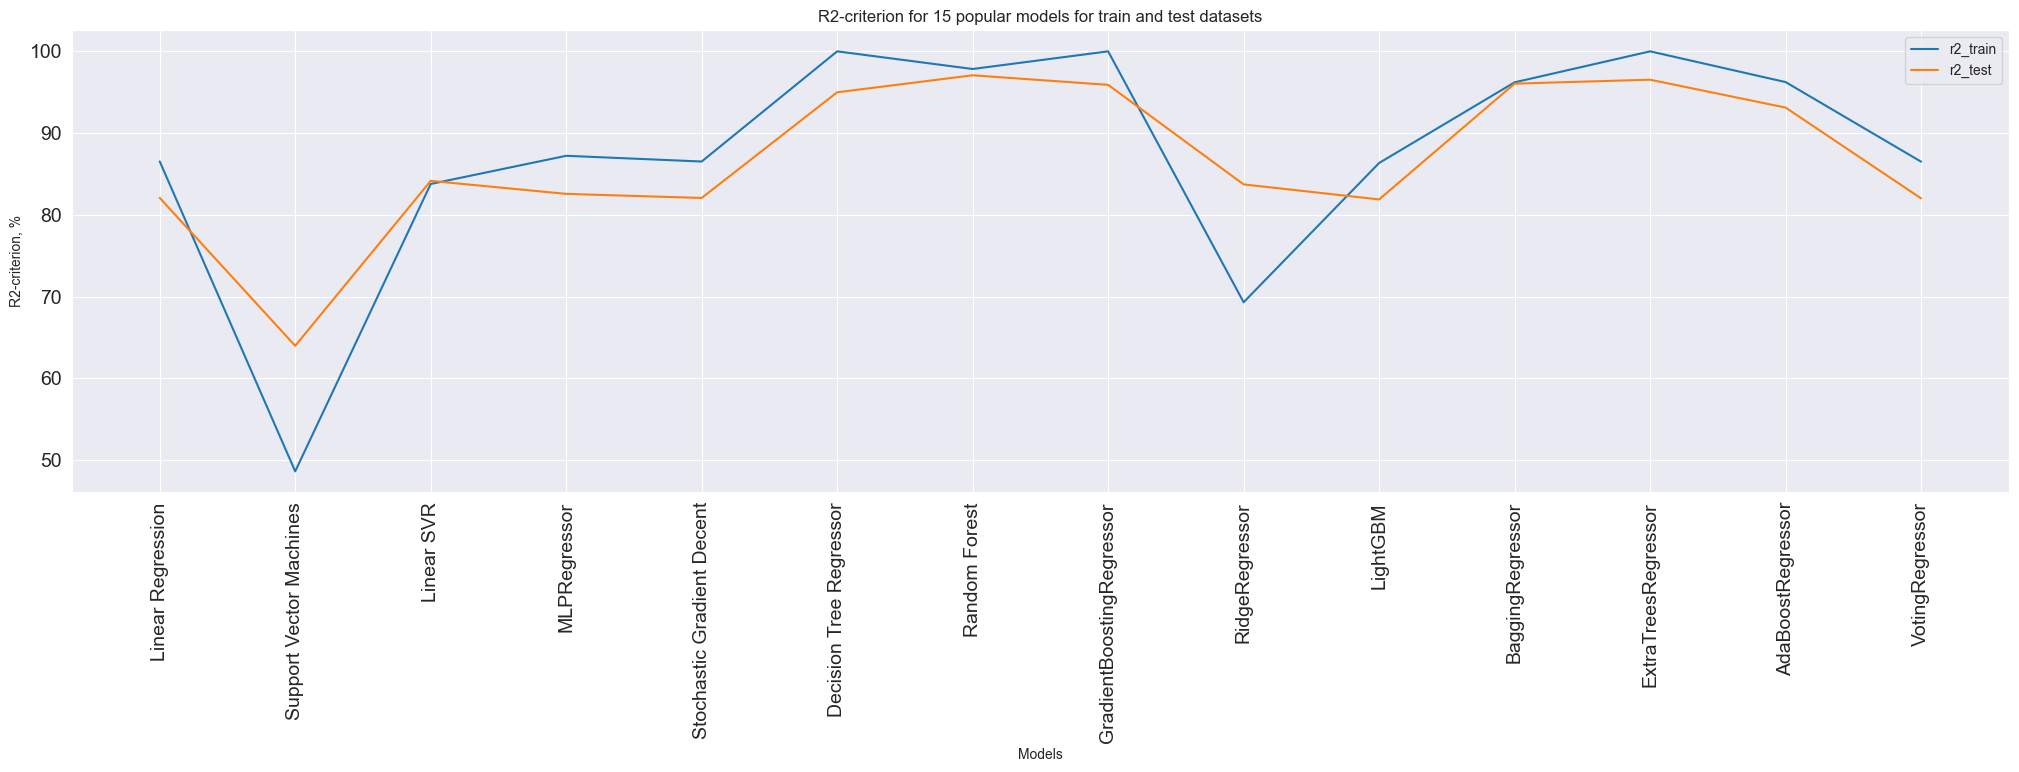

In [91]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['r2_train'], label = 'r2_train')
plt.plot(xx, models['r2_test'], label = 'r2_test')
plt.legend()
plt.title('R2-criterion for 15 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('R2-criterion, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

In [92]:
# Plot with plotly dark theme
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=models['Model'], y=models['r2_train'], name='r2_train'))
fig.add_trace(go.Scatter(x=models['Model'], y=models['r2_test'], name='r2_test'))
fig.update_layout(title='R2-criterion for 15 popular models for train and test datasets',
                   xaxis_title='Models',
                   yaxis_title='R2-criterion, %')
fig.update_layout(template='plotly_dark')
# update size
fig.show()


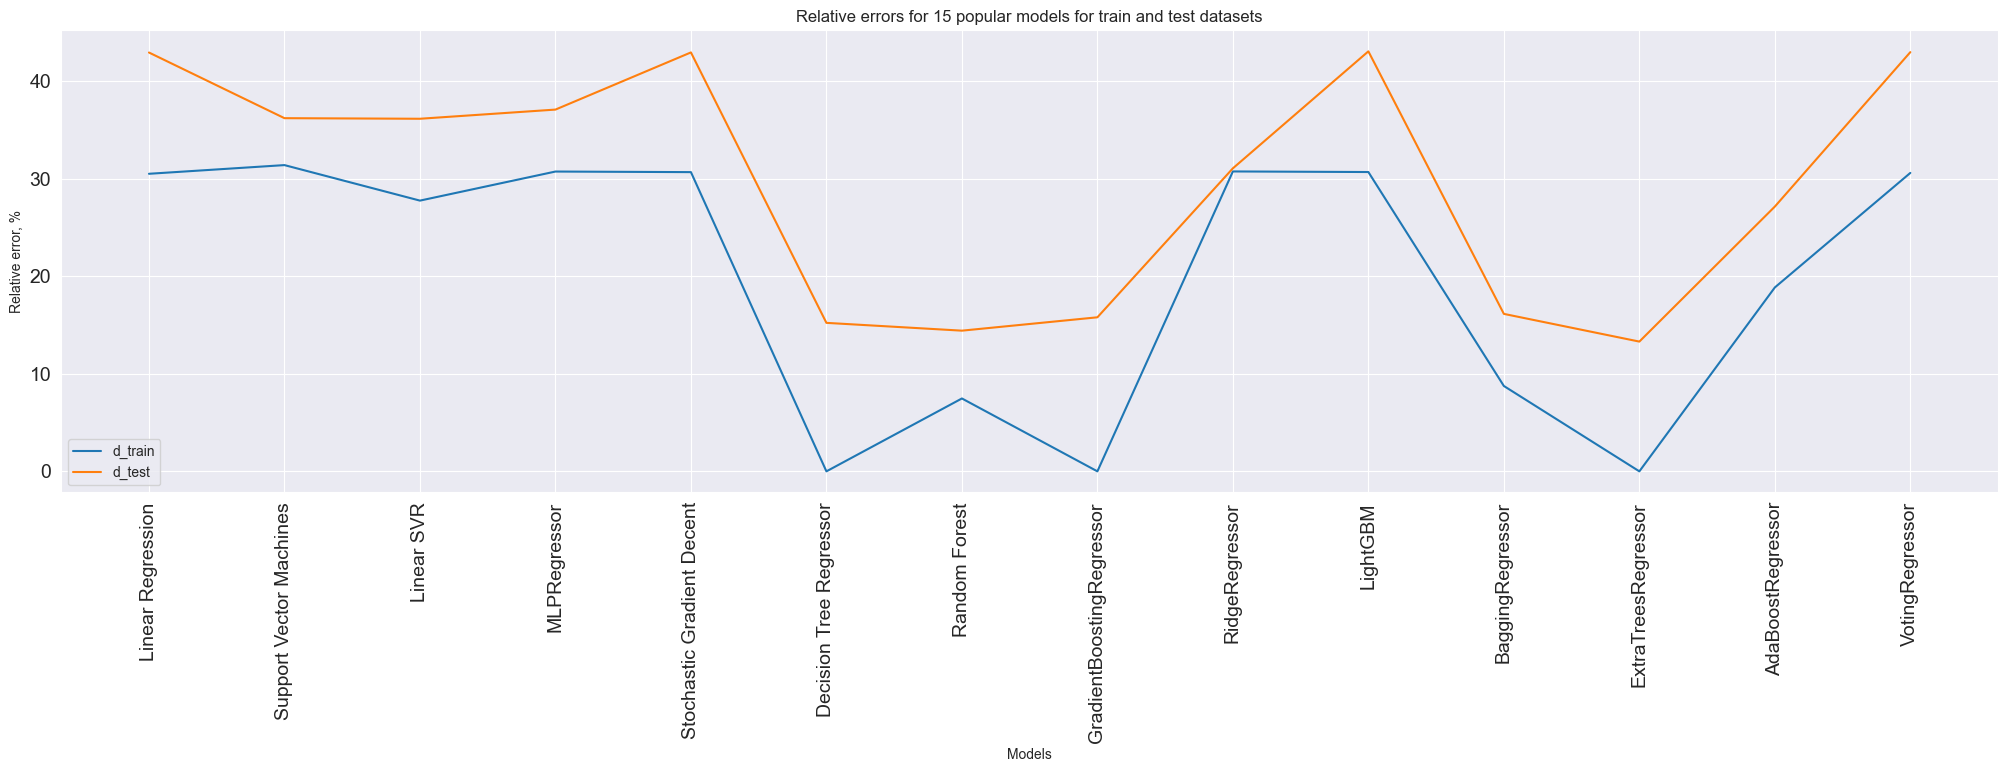

In [93]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['d_train'], label = 'd_train')
plt.plot(xx, models['d_test'], label = 'd_test')
plt.legend()
plt.title('Relative errors for 15 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Relative error, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

In [94]:
# Plot with plotly dark theme
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=models['Model'], y=models['d_train'], name='d_train'))
fig.add_trace(go.Scatter(x=models['Model'], y=models['d_test'], name='d_test'))
fig.update_layout(title='Relative errors for 15 popular models for train and test datasets',
                   xaxis_title='Models',
                   yaxis_title='Relative error, %')
fig.update_layout(template='plotly_dark')
fig.show()

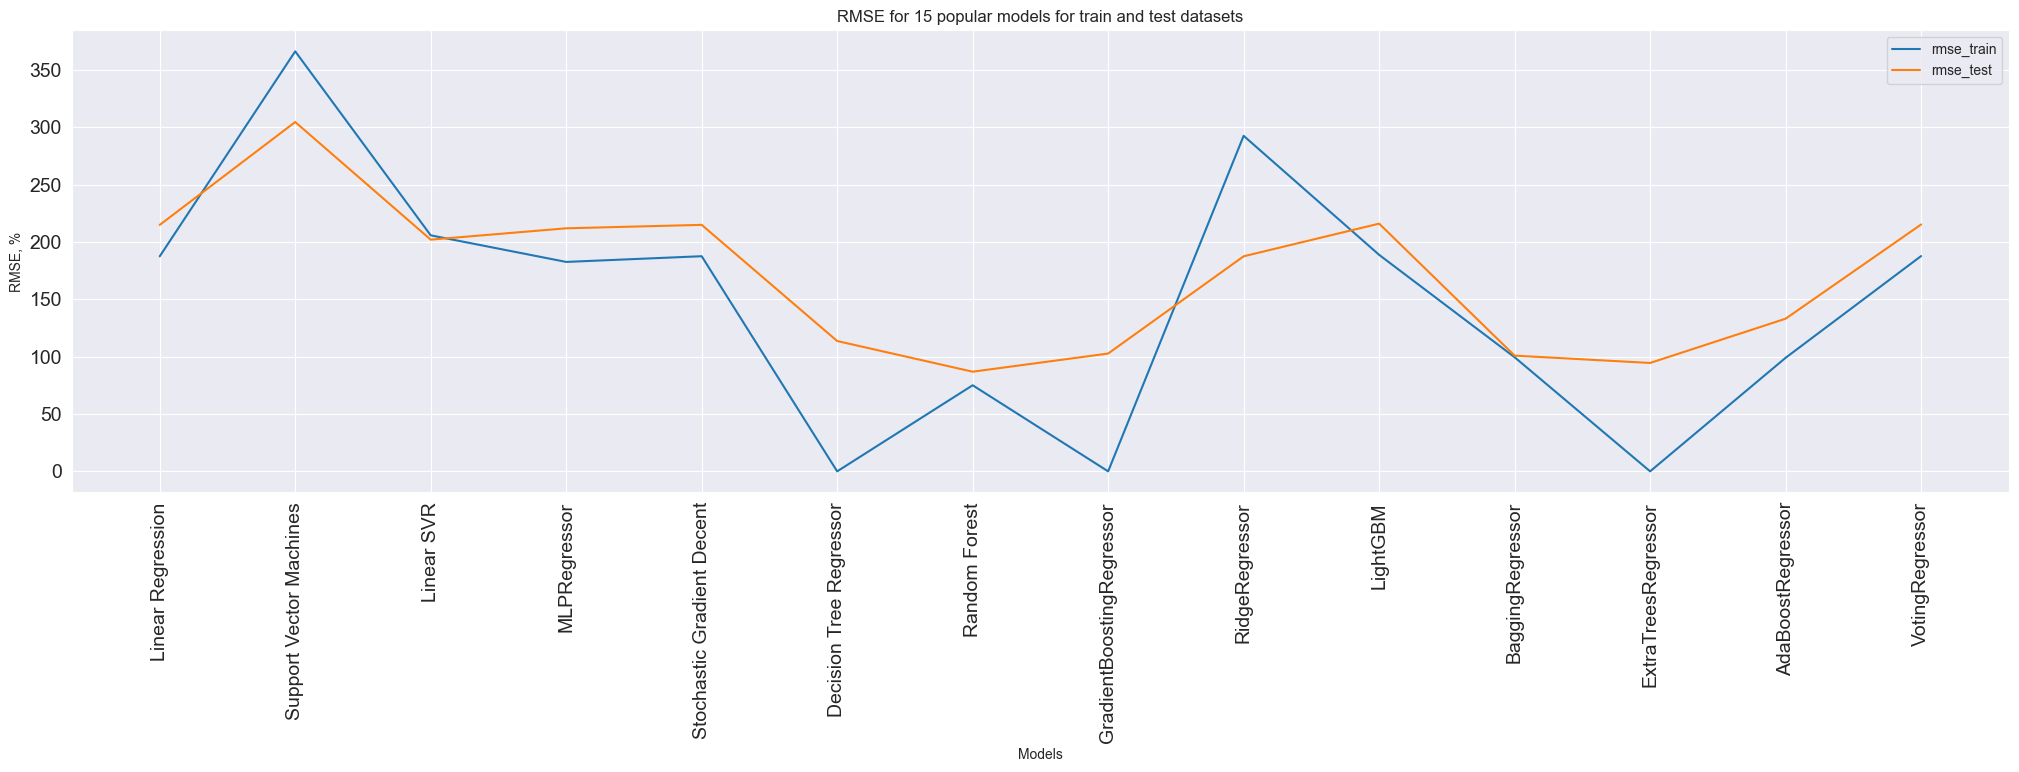

In [95]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['rmse_train'], label = 'rmse_train')
plt.plot(xx, models['rmse_test'], label = 'rmse_test')
plt.legend()
plt.title('RMSE for 15 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('RMSE, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

In [96]:
# Plot with plotly dark theme
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=models['Model'], y=models['rmse_train'], name='rmse_train'))
fig.add_trace(go.Scatter(x=models['Model'], y=models['rmse_test'], name='rmse_test'))
fig.update_layout(title='RMSE for 15 popular models for train and test datasets',
                   xaxis_title='Models',
                   yaxis_title='RMSE, %')
fig.update_layout(template='plotly_dark')
fig.show()


#### Conclusion
The best model by model comparison is

# 5. Prediction

In [97]:
test0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 223 to 92
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Car_Name       61 non-null     int64
 1   Year           61 non-null     int64
 2   Present_Price  61 non-null     int64
 3   Kms_Driven     61 non-null     int64
 4   Fuel_Type      61 non-null     int64
 5   Seller_Type    61 non-null     int64
 6   Transmission   61 non-null     int64
 7   Owner          61 non-null     int64
dtypes: int64(8)
memory usage: 4.3 KB


In [98]:
test0.head(3)

Car_Name  Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  \
223        94   115              9       61381          1            0   
150        52   111              0        6000          2            1   
226        82   115              5       24678          2            0   

     Transmission  Owner  
223             1      0  
150             1      0  
226             1      0

In [99]:
#For models from Sklearn
testn = pd.DataFrame(scaler.transform(test0), columns = test0.columns)

In [100]:
#Linear Regression model for basic train
linreg.fit(train0, train_target0)
linreg.predict(testn)[:3]

array([ 6.67129475, -0.8974948 ,  3.73727157])

In [101]:
#Ridge Regressor model for basic train
ridge.fit(train0, train_target0)
ridge.predict(testn)[:3]

array([ 6.75784942, -0.76673981,  3.80798505])

# Submission
Thank you very much for your attention. I hope you enjoyed this kernel. If you have any questions or suggestions, please leave a comment. If you like this kernel, please upvote it. Thank you!

In [102]:
models.Model.to_list

<bound method IndexOpsMixin.tolist of 0              Linear Regression
1        Support Vector Machines
2                     Linear SVR
3                   MLPRegressor
4     Stochastic Gradient Decent
5        Decision Tree Regressor
6                  Random Forest
7      GradientBoostingRegressor
8                 RidgeRegressor
9                       LightGBM
10              BaggingRegressor
11           ExtraTreesRegressor
12             AdaBoostRegressor
13               VotingRegressor
Name: Model, dtype: object>

In [103]:
models

Model  r2_train  r2_test  d_train  d_test  \
0            Linear Regression     86.53    82.07    30.50   42.93   
1      Support Vector Machines     48.61    63.97    31.39   36.20   
2                   Linear SVR     83.77    84.15    27.75   36.14   
3                 MLPRegressor     87.22    82.56    30.73   37.08   
4   Stochastic Gradient Decent     86.52    82.06    30.67   42.94   
5      Decision Tree Regressor    100.00    94.99     0.00   15.22   
6                Random Forest     97.84    97.07     7.47   14.42   
7    GradientBoostingRegressor    100.00    95.90     0.00   15.79   
8               RidgeRegressor     69.30    83.72    30.74   31.06   
9                     LightGBM     86.34    81.88    30.68   43.05   
10            BaggingRegressor     96.21    96.05     8.75   16.14   
11         ExtraTreesRegressor    100.00    96.53     0.00   13.30   
12           AdaBoostRegressor     96.24    93.12    18.85   27.14   
13             VotingRegressor     86.50    82.01    30.59   42.97   

    rmse_train  rmse_test  
0       187.52     214.93  
1       366.30     304.66  
2       205.84     202.08  
3       182.65     211.97  
4       187.62     214.97  
5         0.00     113.65  
6        75.08      86.91  
7         0.00     102.74  
8       292.64     187.55  
9       188.83     216.04  
10       99.52     100.92  
11        0.00      94.53  
12       99.02     133.12  
13      187.75     215.29

In [104]:
# Rank each model for all values, then take the smallest rank from the ranksum
models['r2_train_rank'] = models['r2_train'].rank(method='min')
models['r2_test_rank'] = models['r2_test'].rank(method='min')
models['d_train_rank'] = models['d_train'].rank(method='min')
models['d_test_rank'] = models['d_test'].rank(method='min')
models['rmse_train_rank'] = models['rmse_train'].rank(method='min')
models['rmse_test_rank'] = models['rmse_test'].rank(method='min')
models['test_ranksum'] = models['r2_train_rank'] + models['r2_test_rank'] + models['d_train_rank'] + models['d_test_rank'] + models['rmse_train_rank'] + models['rmse_test_rank']
# Take only rank and model
models_rank = models[['Model', 'test_ranksum', 'r2_train_rank' , 'r2_test_rank', 'd_train_rank', 'd_test_rank', 'rmse_train_rank', 'rmse_test_rank']]
models_rank.sort_values(by=['test_ranksum'], ascending=True)

Model  test_ranksum  r2_train_rank  r2_test_rank  \
11         ExtraTreesRegressor         30.00          12.00         13.00   
5      Decision Tree Regressor         32.00          12.00         10.00   
7    GradientBoostingRegressor         33.00          12.00         11.00   
6                Random Forest         36.00          11.00         14.00   
10            BaggingRegressor         40.00           9.00         12.00   
12           AdaBoostRegressor         42.00          10.00          9.00   
2                   Linear SVR         46.00           3.00          8.00   
0            Linear Regression         49.00           7.00          5.00   
8               RidgeRegressor         49.00           2.00          7.00   
3                 MLPRegressor         52.00           8.00          6.00   
4   Stochastic Gradient Decent         52.00           6.00          4.00   
13             VotingRegressor         52.00           5.00          3.00   
1      Support Vector Machines         53.00           1.00          1.00   
9                     LightGBM         55.00           4.00          2.00   

    d_train_rank  d_test_rank  rmse_train_rank  rmse_test_rank  
11          1.00         1.00             1.00            2.00  
5           1.00         3.00             1.00            5.00  
7           1.00         4.00             1.00            4.00  
6           4.00         2.00             4.00            1.00  
10          5.00         5.00             6.00            3.00  
12          6.00         6.00             5.00            6.00  
2           7.00         8.00            12.00            8.00  
0           8.00        11.00             8.00           10.00  
8          13.00         7.00            13.00            7.00  
3          12.00        10.00             7.00            9.00  
4          10.00        12.00             9.00           11.00  
13          9.00        13.00            10.00           12.00  
1          14.00         9.00            14.00           14.00  
9          11.00        14.00            11.00           13.00